#Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("hotel_bookings_data.csv")

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


#Data Preprocessing

- Check Missing Values

In [ ]:
# Menemukan jumlah nilai null dalam setiap kolom
null_counts = df.isnull().sum()

# Menampilkan kolom yang memiliki nilai null beserta jumlahnya
null_counts[null_counts > 0]

children         4
city           488
agent        16340
company     112593
dtype: int64

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Mengisi nilai null di kolom 'children' dengan median
df['children'].fillna(df['children'].median(), inplace=True)

# Mengisi nilai null di kolom 'city' dengan modus
city_mode = df['city'].mode().iloc[0]
df['city'].fillna(city_mode, inplace=True)

# Mengisi nilai null di kolom 'agent' dan 'company' dengan 0
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# Verifikasi bahwa tidak ada lagi nilai null di dataset
df.isnull().sum().sum()

0

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# Daftar kolom yang perlu diperiksa
columns_to_check = [
    "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_weekdays_nights",
    "adults", "children", "babies", "meal", "city", "market_segment",
    "distribution_channel", "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "booking_changes", "deposit_type", "agent",
    "company", "days_in_waiting_list", "customer_type", "adr",
    "required_car_parking_spaces", "total_of_special_requests", "reservation_status"
]

# Menemukan jumlah dan tipe nilai yang hilang dalam kolom yang disebutkan
missing_values_check = df[columns_to_check].isin([1]).sum()
missing_values_check[missing_values_check > 0]

arrival_date_day_of_month          3626
stays_in_weekend_nights           30626
stays_in_weekdays_nights          30310
adults                            23027
children                           4861
babies                              900
is_repeated_guest                  3810
previous_cancellations             6051
previous_bookings_not_canceled     1542
booking_changes                   12701
agent                              7191
days_in_waiting_list                 12
adr                                  15
required_car_parking_spaces        7383
total_of_special_requests         33226
dtype: int64

In [ ]:
original_shape = df.shape

In [ ]:
# Menghapus baris yang memiliki nilai null
df_clean = df.dropna(axis=0, how='any')

# Menampilkan ukuran dataset sebelum dan setelah penghapusan baris dengan missing values
clean_shape = df_clean.shape
original_shape, clean_shape

((119390, 29), (119390, 29))

In [ ]:
df_clean.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# Menampilkan nilai unik dalam kolom "meal"
unique_meals = df_clean["meal"].unique()
unique_meals

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [ ]:
# Statistik deskriptif untuk kolom numerik
numeric_stats = df_clean.describe()

# Nilai unik dari kolom kategorikal
categorical_unique_values = {col: df_clean[col].unique() for col in df_clean.select_dtypes(include=['object']).columns}

numeric_stats, categorical_unique_values

(         is_canceled      lead_time  arrival_date_year  \
 count  119390.000000  119390.000000      119390.000000   
 mean        0.370416     104.011416        2018.156554   
 std         0.482918     106.863097           0.707476   
 min         0.000000       0.000000        2017.000000   
 25%         0.000000      18.000000        2018.000000   
 50%         0.000000      69.000000        2018.000000   
 75%         1.000000     160.000000        2019.000000   
 max         1.000000     737.000000        2019.000000   
 
        arrival_date_week_number  arrival_date_day_of_month  \
 count             119390.000000              119390.000000   
 mean                  27.165173                  15.798241   
 std                   13.605138                   8.780829   
 min                    1.000000                   1.000000   
 25%                   16.000000                   8.000000   
 50%                   28.000000                  16.000000   
 75%                   38.

In [ ]:
# Mengganti nilai 'Undefined' dalam kolom 'market_segment' dan 'distribution_channel' dengan 'Unknown'
df_clean['market_segment'].replace('Undefined', 'Unknown', inplace=True)
df_clean['distribution_channel'].replace('Undefined', 'Unknown', inplace=True)

# Mengganti nilai 55 dalam kolom 'adults' dengan median dari kolom tersebut
median_adults = df_clean['adults'].median()
df_clean['adults'].replace(55, median_adults, inplace=True)

# Memeriksa kembali nilai unik dari kolom yang telah diubah
updated_values = {
    'market_segment': df_clean['market_segment'].unique(),
    'distribution_channel': df_clean['distribution_channel'].unique(),
    'adults': [df_clean['adults'].min(), df_clean['adults'].max()]
}

updated_values

{'market_segment': array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
        'Complementary', 'Groups', 'Unknown', 'Aviation'], dtype=object),
 'distribution_channel': array(['Direct', 'Corporate', 'TA/TO', 'Unknown', 'GDS'], dtype=object),
 'adults': [0, 50]}

In [ ]:
# Membuang baris di mana total jumlah tamu (adults + children + babies) adalah nol
df_clean = df_clean[df_clean['adults'] + df_clean['children'] + df_clean['babies'] > 0]

# Menampilkan ukuran dataset setelah membuang baris dengan total jumlah tamu nol
clean_shape_after_removal = df_clean.shape
clean_shape_after_removal

(119210, 29)

#Monthly Hotel Booking Analysis Based on Hotel Type

In [ ]:
# Melakukan agregasi berdasarkan jenis hotel, tahun kedatangan, dan bulan kedatangan
# Kemudian menghitung jumlah pemesanan untuk setiap kombinasi
hotel_booking_aggregate = df_clean.groupby(['hotel', 'arrival_date_year', 'arrival_date_month']).size().reset_index(name='number_of_bookings')

# Mengubah kolom 'arrival_date_month' menjadi tipe kategori agar dapat diurutkan dalam urutan bulan
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hotel_booking_aggregate['arrival_date_month'] = pd.Categorical(hotel_booking_aggregate['arrival_date_month'], categories=months_order, ordered=True)

# Mengurutkan data berdasarkan jenis hotel, tahun kedatangan, dan bulan kedatangan
hotel_booking_aggregate = hotel_booking_aggregate.sort_values(['hotel', 'arrival_date_year', 'arrival_date_month'])

# Menampilkan tabel agregat
hotel_booking_aggregate

,hotel,arrival_date_year,arrival_date_month,number_of_bookings
2,City Hotel,2017,January,1233
1,City Hotel,2017,February,1649
5,City Hotel,2017,September,1396
4,City Hotel,2017,October,2474
3,City Hotel,2017,November,3524
0,City Hotel,2017,December,3382
10,City Hotel,2018,January,3103
9,City Hotel,2018,February,2465
13,City Hotel,2018,March,1364
6,City Hotel,2018,April,2365


In [ ]:
# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Mengambil data pemesanan untuk bulan September dan Oktober
sept_oct_data = hotel_booking_aggregate[hotel_booking_aggregate['arrival_date_month'].isin(['September', 'October'])]

# Melakukan normalisasi pada kolom 'number_of_bookings' untuk setiap jenis hotel
for hotel_type in ['City Hotel', 'Resort Hotel']:
    # Mengambil data untuk jenis hotel tertentu
    hotel_data = sept_oct_data[sept_oct_data['hotel'] == hotel_type]

    # Mengubah kolom 'number_of_bookings' menjadi skala 0-1
    hotel_booking_aggregate.loc[hotel_data.index, 'number_of_bookings'] = scaler.fit_transform(hotel_data[['number_of_bookings']])

# Menampilkan tabel agregat setelah normalisasi untuk bulan September dan Oktober
hotel_booking_aggregate[hotel_booking_aggregate['arrival_date_month'].isin(['September', 'October'])]

,hotel,arrival_date_year,arrival_date_month,number_of_bookings
5,City Hotel,2017,September,0.000000
4,City Hotel,2017,October,0.499074
17,City Hotel,2018,September,0.797685
16,City Hotel,2018,October,0.913889
25,City Hotel,2019,September,1.000000
24,City Hotel,2019,October,0.799537
31,Resort Hotel,2017,September,0.000000
30,Resort Hotel,2017,October,0.073460
43,Resort Hotel,2018,September,0.149289
42,Resort Hotel,2018,October,0.727488


In [ ]:
# Mengurutkan tabel agregat berdasarkan jenis hotel, tahun kedatangan, dan bulan kedatangan dalam urutan kalender
hotel_booking_aggregate_sorted = hotel_booking_aggregate.sort_values(['hotel', 'arrival_date_year', 'arrival_date_month'])

# Menampilkan tabel agregat yang telah diurutkan
hotel_booking_aggregate_sorted

,hotel,arrival_date_year,arrival_date_month,number_of_bookings
2,City Hotel,2017,January,1233.000000
1,City Hotel,2017,February,1649.000000
5,City Hotel,2017,September,0.000000
4,City Hotel,2017,October,0.499074
3,City Hotel,2017,November,3524.000000
0,City Hotel,2017,December,3382.000000
10,City Hotel,2018,January,3103.000000
9,City Hotel,2018,February,2465.000000
13,City Hotel,2018,March,1364.000000
6,City Hotel,2018,April,2365.000000


<ipython-input-20-3a9f6fcdfa7d>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hotel_booking_aggregate_sorted, x='arrival_date_month', y='number_of_bookings', hue='hotel', ci=None, marker='o')


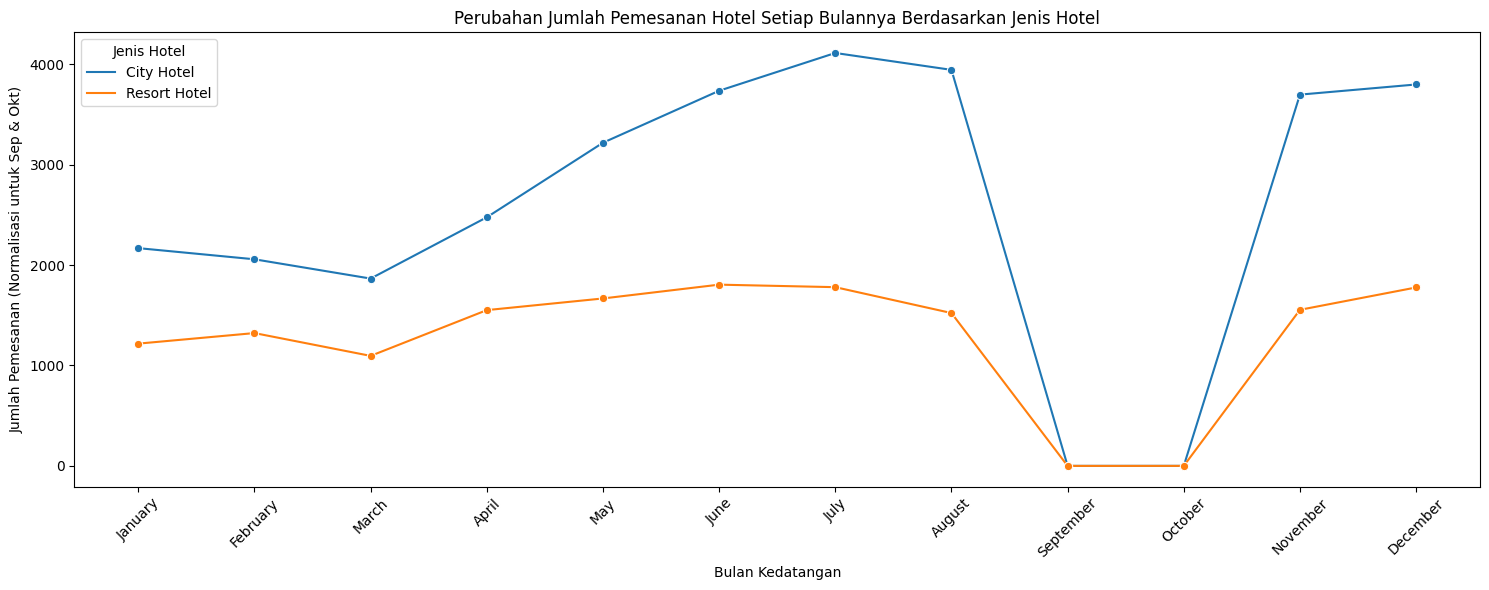

In [ ]:
# Mengatur ukuran plot
plt.figure(figsize=(15, 6))

# Menggunakan seaborn untuk membuat plot garis
sns.lineplot(data=hotel_booking_aggregate_sorted, x='arrival_date_month', y='number_of_bookings', hue='hotel', ci=None, marker='o')

# Menambahkan judul dan label
plt.title('Perubahan Jumlah Pemesanan Hotel Setiap Bulannya Berdasarkan Jenis Hotel')
plt.xlabel('Bulan Kedatangan')
plt.ylabel('Jumlah Pemesanan (Normalisasi untuk Sep & Okt)')
plt.xticks(rotation=45)
plt.legend(title='Jenis Hotel')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Interpretasi Plot berdasarkan Perubahan Jumlah Pemesanan Hotel 2017-2019:**

Berdasarkan plot yang tertera diatas, jumlah pemesanan hotel pada bulan september dan oktober setiap tahunnya (2017-2019) paling rendah dibandingkan bulan-bulan lainnya. Hal ini memiliki alasan seperti pada bulan-bulan tersebut tidak memiliki hari libur yang panjang dan hanya bulan September 2017 yang memiliki hari libur di hari biasa yaitu pada hari Jumat, 1 September memperingati hari raya Idul Adha dan hari Kamis, 21 September memperingati Tahun Baru Hijriyah sehingga pemesanan hotel hanya mengalami sedikit peningkatan dan paling turun diantara bulan-bulan lainnya.

Perbandingan jumlah pemesanan pada bulan September dan Oktober dengan bulan-bulan lainnya dalam data ini menunjukkan perbedaan yang sangat mencolok. Pada bulan September dan Oktober, baik di City Hotel maupun Resort Hotel, jumlah pemesanan mengalami penurunan drastis yang mendekati nol. Sementara itu, pada bulan-bulan lain, jumlah pemesanan cenderung berada dalam rentang yang jauh lebih tinggi, seringkali dalam ribuan.

Misalnya, di City Hotel, jumlah pemesanan pada bulan sebelum dan sesudah September dan Oktober biasanya berkisar antara 1000 hingga 4000, tergantung tahunnya. Sedangkan di Resort Hotel, jumlah pemesanan berkisar antara 800 hingga 1800. Perbedaan ini sangat signifikan dan mencerminkan adanya sesuatu yang tidak biasa terjadi pada bulan September dan Oktober.

Perbandingan ini menegaskan bahwa terdapat pola atau fenomena khusus yang terjadi pada bulan September dan Oktober yang tidak terlihat pada bulan-bulan lain. Apakah ini disebabkan oleh faktor musiman, perubahan dalam proses pencatatan, atau faktor eksternal lainnya, perlu penyelidikan lebih lanjut untuk memahami sepenuhnya. Namun, jelas bahwa periode ini berbeda dari sisa tahun dalam hal pemesanan hotel, dan ini dapat memiliki implikasi penting bagi manajemen hotel dalam merencanakan dan menyesuaikan strategi bisnis mereka.

<ipython-input-25-27ad30abcba2>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sept_oct_data_only, x='arrival_date_year', y='number_of_bookings', hue='hotel', ci=None, palette='viridis')


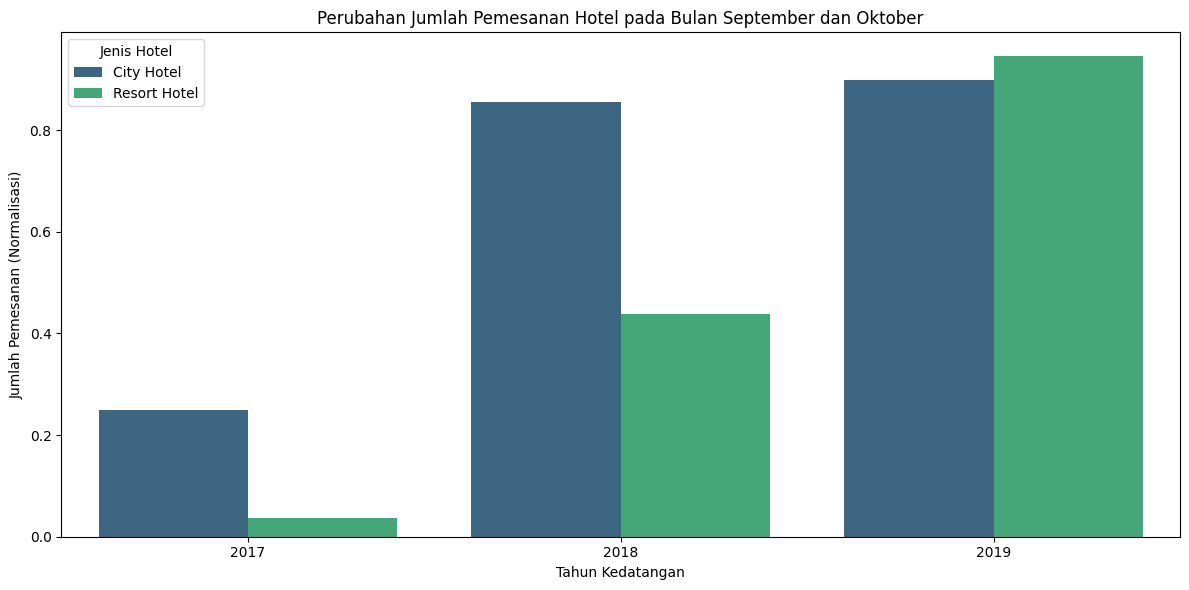

In [ ]:
sept_oct_data_only = hotel_booking_aggregate[hotel_booking_aggregate['arrival_date_month'].isin(['September', 'October'])]

# Mengatur ukuran plot
plt.figure(figsize=(12, 6))

# Menggunakan seaborn untuk membuat plot batang
sns.barplot(data=sept_oct_data_only, x='arrival_date_year', y='number_of_bookings', hue='hotel', ci=None, palette='viridis')

# Menambahkan judul dan label
plt.title('Perubahan Jumlah Pemesanan Hotel pada Bulan September dan Oktober')
plt.xlabel('Tahun Kedatangan')
plt.ylabel('Jumlah Pemesanan (Normalisasi)')
plt.legend(title='Jenis Hotel', labels=['City Hotel', 'Resort Hotel'])

# Menampilkan plot
plt.tight_layout()
plt.show()

**Interpretasi Plot pada Bulan September & Oktober 2017-2018:**

Pada tahun 2017, meskipun terdapat hari libur pada awal September namun justru memiliki jumlah pemesanan hotel yang paling rendah dibandingkan tahun-tahun berikutnya. City Hotel memiliki jumlah pemesanan hotel yang lebih tinggi daripada Resort Hotel.

Tahun berikutnya yaitu tahun 2018, jumlah pemesanan hotel mengalami peningkatan yang drastis dibandingkan tahun lalu dimana hal tersebut dapat disimpulkan bahwa tingkat promosi sudah semakin bagus pada kedua hotel terutama pada City Hotel yang meningkat sangat drastis daripada Resort Hotel yang mengalami peningkatan juga secara stabil.

Pada tahun berikutnya yaitu tahun 2019, Resort Hotel mengalami peningkatan jumlah pemesanan hotel daripada tahun sebelumnya yang sedikit lebih unggul dibandingkan City Hotel yang selama dua tahun terakhir jumlah lebih unggul daripada Resort Hotel. Hal tersebut dapat dikaitkan dengan sistem promosi Resort Hotel yang lebih baik, persaingan yang ketat atau fasilitas yang ditawarkan sudah lebih unggul daripada sebelumnya.

#Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [ ]:
# Menambahkan kolom 'total_stay_duration' yang berisi total durasi menginap
df_clean.loc[:, 'total_stay_duration'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']

# Menampilkan 5 baris pertama dari dataset yang telah diperbarui
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2


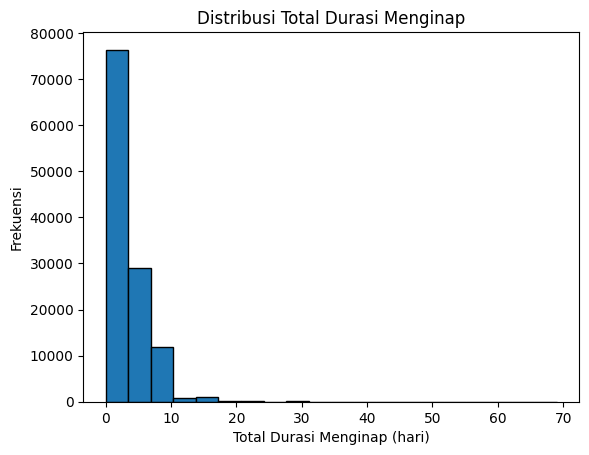

count    119210.000000
mean          3.426248
std           2.540692
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_stay_duration, dtype: float64

In [ ]:
# Statistik deskriptif dari kolom 'total_stay_duration'
stay_duration_stats = df_clean['total_stay_duration'].describe()

plt.hist(df_clean['total_stay_duration'], bins=20, edgecolor='black')
plt.title('Distribusi Total Durasi Menginap')
plt.xlabel('Total Durasi Menginap (hari)')
plt.ylabel('Frekuensi')
plt.show()

stay_duration_stats

In [ ]:
# Fungsi untuk mengkategorikan total durasi menginap
def categorize_stay_duration(duration):
    if duration <= 2:
        return 'Singkat'
    elif duration <= 5:
        return 'Sedang'
    elif duration <= 8:
        return 'Lama'
    else:
        return 'Sangat Lama'

# Menerapkan fungsi ke kolom 'total_stay_duration' dan membuat kolom baru 'stay_duration_category'
df_clean['stay_duration_category'] = df_clean['total_stay_duration'].apply(categorize_stay_duration)

# Menampilkan 5 baris pertama dari dataset yang telah diperbarui
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration,stay_duration_category
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,0,Singkat
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,0,Singkat
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1,Singkat
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1,Singkat
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2,Singkat


In [ ]:
# Mengelompokkan data berdasarkan jenis hotel dan kategori durasi menginap
# Kemudian menghitung jumlah pemesanan dan proporsi pemesanan yang dibatalkan
aggregated_data = df_clean.groupby(['hotel', 'stay_duration_category']).agg(
    total_bookings=pd.NamedAgg(column='is_canceled', aggfunc='size'),
    canceled_bookings=pd.NamedAgg(column='is_canceled', aggfunc='sum')
).reset_index()

# Menghitung proporsi pemesanan yang dibatalkan
aggregated_data['cancellation_rate'] = aggregated_data['canceled_bookings'] / aggregated_data['total_bookings'] * 100

# Menampilkan tabel agregat
aggregated_data

,hotel,stay_duration_category,total_bookings,canceled_bookings,cancellation_rate
0,City Hotel,Lama,4483,1922,42.873076
1,City Hotel,Sangat Lama,840,499,59.404762
2,City Hotel,Sedang,38903,16110,41.410688
3,City Hotel,Singkat,34937,14548,41.640667
4,Resort Hotel,Lama,9166,3018,32.926031
5,Resort Hotel,Sangat Lama,3231,938,29.031260
6,Resort Hotel,Sedang,13305,4257,31.995490
7,Resort Hotel,Singkat,14345,2907,20.264901


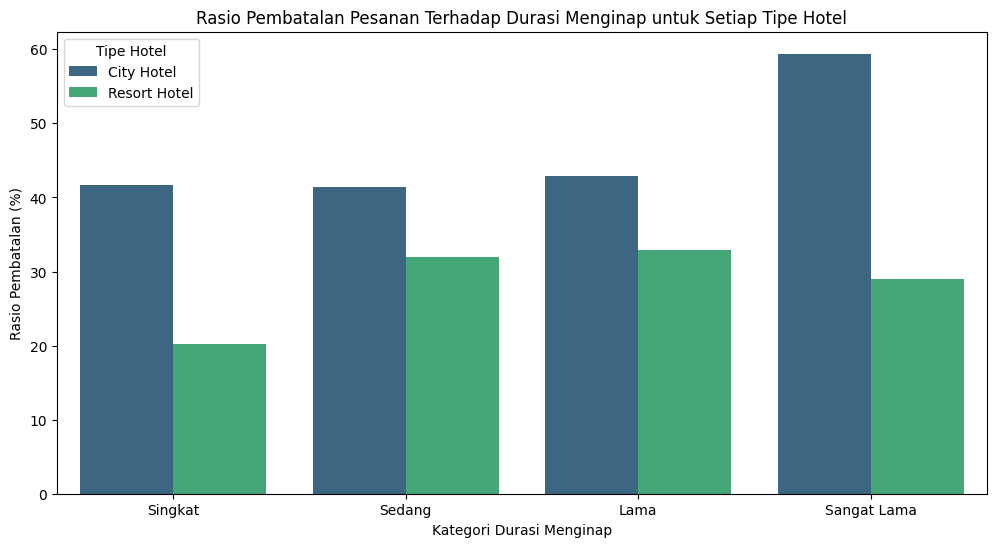

In [ ]:
# Menentukan urutan kategori durasi menginap
order_categories = ['Singkat', 'Sedang', 'Lama', 'Sangat Lama']

# Mengatur ukuran plot
plt.figure(figsize=(12, 6))

# Membuat bar plot dengan urutan kategori yang ditentukan
sns.barplot(x='stay_duration_category', y='cancellation_rate', hue='hotel', data=aggregated_data,
            order=order_categories, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('Rasio Pembatalan Pesanan Terhadap Durasi Menginap untuk Setiap Tipe Hotel')
plt.xlabel('Kategori Durasi Menginap')
plt.ylabel('Rasio Pembatalan (%)')
plt.legend(title='Tipe Hotel')

plt.show()

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

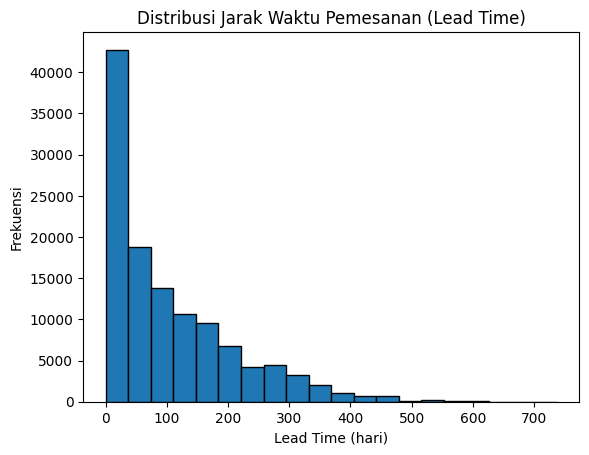

count    119210.000000
mean        104.109227
std         106.875450
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

In [ ]:
# Statistik deskriptif dari kolom 'lead_time'
lead_time_stats = df_clean['lead_time'].describe()

# Histogram dari kolom 'lead_time'
plt.hist(df_clean['lead_time'], bins=20, edgecolor='black')
plt.title('Distribusi Jarak Waktu Pemesanan (Lead Time)')
plt.xlabel('Lead Time (hari)')
plt.ylabel('Frekuensi')
plt.show()

lead_time_stats

In [ ]:
# Fungsi untuk mengkategorikan lead time
def categorize_lead_time(lead_time):
    if lead_time <= 12:
        return 'Sangat Cepat'
    elif lead_time <= 27:
        return 'Cepat'
    elif lead_time <= 36:
        return 'Sedang'
    else:
        return 'Lama'

# Menerapkan fungsi ke kolom 'lead_time' dan membuat kolom baru 'lead_time_category'
df_clean['lead_time_category'] = df_clean['lead_time'].apply(categorize_lead_time)

# Menampilkan 5 baris pertama dari dataset yang telah diperbarui
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration,stay_duration_category,lead_time_category
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,0,Singkat,Lama
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,0,Singkat,Lama
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1,Singkat,Sangat Cepat
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1,Singkat,Cepat
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0.0,0,Personal,98.0,0,1,Check-Out,2,Singkat,Cepat


In [ ]:
# Mengelompokkan data berdasarkan jenis hotel dan kategori lead time
# Kemudian menghitung jumlah pemesanan dan proporsi pemesanan yang dibatalkan
lead_time_aggregated_data = df_clean.groupby(['hotel', 'lead_time_category']).agg(
    total_bookings=pd.NamedAgg(column='is_canceled', aggfunc='size'),
    canceled_bookings=pd.NamedAgg(column='is_canceled', aggfunc='sum')
).reset_index()

# Menghitung proporsi pemesanan yang dibatalkan
lead_time_aggregated_data['cancellation_rate'] = lead_time_aggregated_data['canceled_bookings'] / lead_time_aggregated_data['total_bookings'] * 100

# Menampilkan tabel agregat
lead_time_aggregated_data

,hotel,lead_time_category,total_bookings,canceled_bookings,cancellation_rate
0,City Hotel,Cepat,7646,2407,31.480513
1,City Hotel,Lama,53048,26839,50.593802
2,City Hotel,Sangat Cepat,14064,2163,15.379693
3,City Hotel,Sedang,4405,1670,37.911464
4,Resort Hotel,Cepat,3873,921,23.780015
5,Resort Hotel,Lama,23425,8802,37.575240
6,Resort Hotel,Sangat Cepat,10807,885,8.189137
7,Resort Hotel,Sedang,1942,512,26.364573


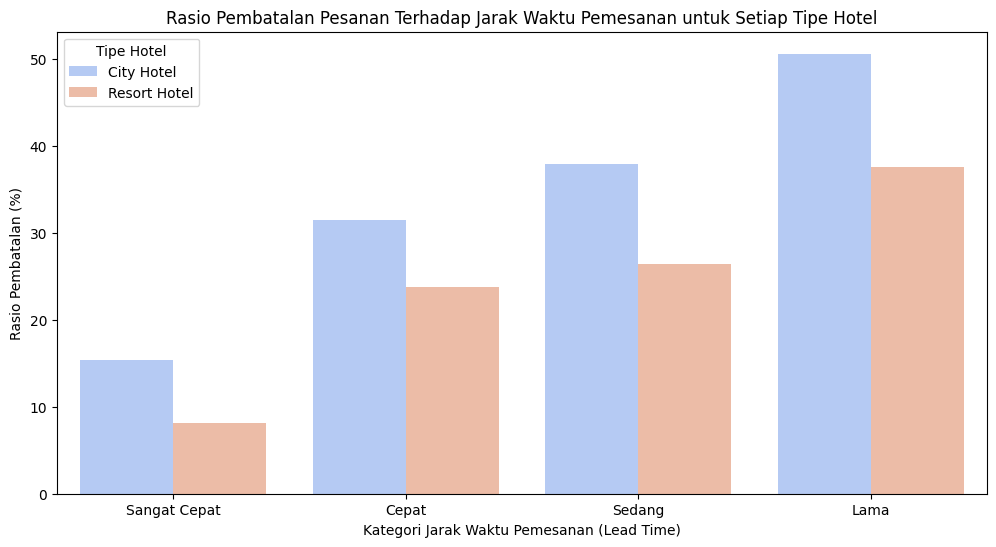

In [ ]:
# Menentukan urutan kategori jarak waktu pemesanan (lead time)
order_lead_time_categories = ['Sangat Cepat', 'Cepat', 'Sedang', 'Lama']

# Mengatur ukuran plot
plt.figure(figsize=(12, 6))

# Membuat bar plot dengan urutan kategori yang ditentukan
sns.barplot(x='lead_time_category', y='cancellation_rate', hue='hotel', data=lead_time_aggregated_data,
            order=order_lead_time_categories, palette='coolwarm')

# Menambahkan judul dan label sumbu
plt.title('Rasio Pembatalan Pesanan Terhadap Jarak Waktu Pemesanan untuk Setiap Tipe Hotel')
plt.xlabel('Kategori Jarak Waktu Pemesanan (Lead Time)')
plt.ylabel('Rasio Pembatalan (%)')
plt.legend(title='Tipe Hotel')

plt.show()

Berikut adalah interpretasi dari plot batang yang menunjukkan rasio pembatalan pesanan terhadap jarak waktu pemesanan (lead time) untuk setiap jenis hotel:

1. **Interval Sangat Cepat (0 - 12 hari):**
   - Untuk pemesanan dengan jarak waktu yang sangat cepat, City Hotel memiliki tingkat pembatalan yang lebih tinggi dibandingkan dengan Resort Hotel.
   - Tingkat pembatalan relatif rendah pada interval ini, mungkin menunjukkan bahwa pemesanan dengan jarak waktu yang sangat cepat cenderung lebih pasti dan jarang dibatalkan.

2. **Interval Cepat (13 - 27 hari):**
   - Pada interval ini, City Hotel juga memiliki tingkat pembatalan yang lebih tinggi dibandingkan dengan Resort Hotel.
   - Tingkat pembatalan cenderung naik dibandingkan dengan interval Sangat Cepat, menunjukkan bahwa pemesanan yang dilakukan lebih awal mungkin memiliki risiko pembatalan yang lebih tinggi.

3. **Interval Sedang (28 - 36 hari):**
   - Sama seperti interval sebelumnya, City Hotel memiliki tingkat pembatalan yang lebih tinggi.
   - Tingkat pembatalan terus naik, tetapi peningkatan tidak terlalu signifikan dibandingkan dengan interval Cepat.

4. **Interval Lama (> 36 hari):**
   - City Hotel terus menunjukkan tingkat pembatalan yang lebih tinggi.
   - Tingkat pembatalan pada interval ini meningkat secara signifikan dibandingkan dengan interval sebelumnya. Hal ini mungkin menunjukkan bahwa pemesanan yang dilakukan jauh-jauh hari lebih rentan terhadap pembatalan.

**Kesimpulan:**
- City Hotel cenderung memiliki tingkat pembatalan yang lebih tinggi dibandingkan dengan Resort Hotel di semua interval jarak waktu pemesanan.
- Ada pola peningkatan tingkat pembatalan seiring dengan meningkatnya jarak waktu pemesanan. Pemesanan yang dilakukan lebih awal cenderung memiliki risiko pembatalan yang lebih tinggi.
- Pengaruh interval waktu terhadap tingkat pembatalan menunjukkan bahwa strategi manajemen reservasi dan kebijakan pembatalan mungkin perlu disesuaikan berdasarkan jarak waktu pemesanan.

#Kesimpulan dalam segi bisnis:

Setelah melakukan berbagai analisa dan visualisasi data untuk mengetahui jumlah pemesanan dan cancellation rate pada setiap hotel, dapat disimpulkan bahwa kedua hotel saling bersaing dalam peningkatan jumlah pemesanan dan juga berusaha untuk mengurangi cancellation rate agar tidak mengurangi pendapatan hotel dan memperbolehkan untuk melakukan cancel jika terjadi pada jauh-jauh hari penginapan di hotel.

Penjualan kamar hotel keduanya terbilang stabil dan tidak ada yang sangat buruk sehingga persaingan antar kedua hotel cukup ketat. Hal ini dipicu berbagai alasan seperti guest yang nyaman dengan fasilitas hotel, jarak dengan tujuan wisata strategis, promosi yang baik, dan harga yang bersaing.

Hal yang harus dilakukan untuk mengurangi cancellation rate ialah menghilangkan tombol pembatalan jika ingin memesan kamar hotel atau mengadakan pembayaran denda jika batal pada sehari sebelum penginapan agar cancellation rate menjadi berkurang dan untuk meningkatkan pemesanan kamar adalah dengan meningkatkan kualitas, promosi, dan fasilitas yang disediakan.